# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
test_url= "http://api.openweathermap.org/data/2.5/weather?q=" + cities[0] + "&appid=" + api_key
test_response = requests.get(test_url).json()
print(cities[0])
test_response

pokhara


{'coord': {'lon': 83.99, 'lat': 28.21},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 285.5,
  'pressure': 1007.09,
  'humidity': 85,
  'temp_min': 285.5,
  'temp_max': 285.5,
  'sea_level': 1007.09,
  'grnd_level': 738.26},
 'wind': {'speed': 0.93, 'deg': 358.957},
 'rain': {'3h': 0.375},
 'clouds': {'all': 89},
 'dt': 1563217069,
 'sys': {'message': 0.0067,
  'country': 'NP',
  'sunrise': 1563233821,
  'sunset': 1563283358},
 'timezone': 20700,
 'id': 1282898,
 'name': 'Pokhara',
 'cod': 200}

In [31]:
listed_cities = []
lat = []
long = []
country = []
humidity= []
max_temp = []
wind_speed = []
cloudiness = []

for city in cities:
    query_url = "http://api.openweathermap.org/data/2.5/weather?q=" + city + "&appid=" + api_key
    response = requests.get(query_url).json()
    try:
        print(f"{response['cod']} response query.")
        listed_cities.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response["clouds"]["all"])
    except: KeyError
temp_celsius = [temp-273 for temp in max_temp]

200 response query.
200 response query.
200 response query.
200 response query.
404 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
404 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
404 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.


200 response query.
200 response query.
404 response query.
200 response query.
200 response query.
404 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
404 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
404 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.
200 response query.


In [33]:
weather_df = pd.DataFrame({"City": listed_cities,
                           "Country": country,
                           "Lat": lat,
                           "Long": long,
                           "Temp":temp_celsius,
                           "Humidity": humidity,
                           "Wind Speed": wind_speed,
                           "Cloudiness": cloudiness})
weather_df
weather_df.to_csv(output_data_file)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
weather_df.count()

City          554
Country       554
Lat           554
Long          554
Temp          554
Humidity      554
Wind Speed    554
Cloudiness    554
dtype: int64

In [35]:
weather_df.head()

,City,Country,Lat,Long,Temp,Humidity,Wind Speed,Cloudiness
0,Pokhara,NP,28.21,83.99,12.50,85,0.93,89
1,Ushuaia,AR,-54.81,-68.31,5.71,75,5.10,75
2,Mataura,NZ,-46.19,168.86,4.10,92,0.15,86
3,Grand Gaube,MU,-20.01,57.66,20.97,56,6.70,75
4,Vao,EE,59.10,26.19,15.30,86,1.88,60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

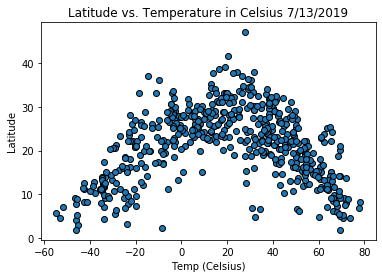

In [36]:
plt.scatter(weather_df["Lat"], weather_df["Temp"], edgecolors = "black")
plt.xlabel("Temp (Celsius)")
plt.ylabel("Latitude")
plt.title("Latitude vs. Temperature in Celsius 7/13/2019")
plt.grid
plt.savefig("Figures/Temperature.png")

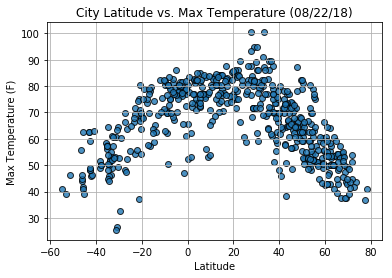

#### Latitude vs. Humidity Plot

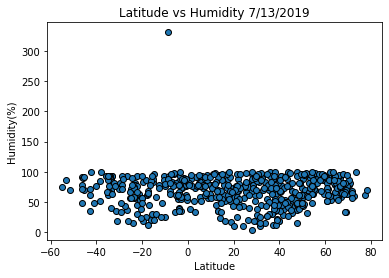

In [37]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolors = "black")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.title("Latitude vs Humidity 7/13/2019")
plt.grid
plt.savefig("Figures/Humidity.png")

#### Latitude vs. Cloudiness Plot

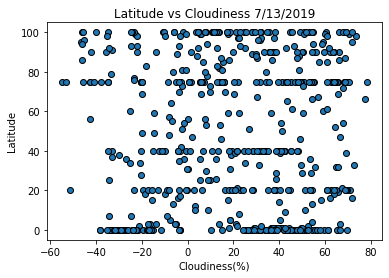

In [38]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness ()")
plt.title("Latitude vs Cloudiness 7/13/2019")
plt.savefig("Figures/Cloudiness.png")

#### Latitude vs. Wind Speed Plot

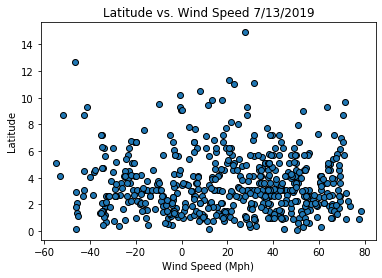

In [40]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed 7/13/2019")
plt.savefig("Figures/Wind_Speed.png")